In [1]:
import pandas as pd
import geopandas
import folium

In [2]:
df = pd.read_excel("meta.xlsx")

geometry = geopandas.points_from_xy(df.lat, df.lon)
geo_df = geopandas.GeoDataFrame(
    df, geometry=geometry
)

geo_df.head()

,city_id,city,lon,lat,area,density,no_people,geometry
0,biala_podlaska,Biała Podlaska,52.033333,23.116667,49.40,1152.06,56942,POINT (23.11667 52.03333)
1,bialystok,Białystok,53.135278,23.145556,102.13,2872.90,293413,POINT (23.14556 53.13528)
2,bielsko_biala,Bielsko-Biała,49.822500,19.044444,124.51,1351.90,168319,POINT (19.04444 49.82250)
3,bydgoszcz,Bydgoszcz,53.125000,18.011111,175.98,1941.70,337666,POINT (18.01111 53.12500)
4,gdansk,Gdańsk,54.347500,18.645278,263.44,1845.00,486022,POINT (18.64528 54.34750)


In [18]:
import datetime
str(datetime.datetime.now() + datetime.timedelta(days=1))[:10]

'2023-01-14'

In [12]:
geo_df[['lon', 'lat']].mean(axis=1)

/var/folders/8x/sm4wjnfx3q36gjxsbvws03_h0000gn/T/ipykernel_1620/2037569585.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  geo_df[['lon', 'lat']].mean(axis=1)


0     52.033333
1     53.135278
2     49.822500
3     53.125000
4     54.347500
5     52.730833
6     51.762500
7     50.264167
8     54.190278
9     50.061389
10    51.250000
11    52.408333
12    51.403611
13    50.033611
14    54.101111
15    53.438056
16    53.720833
17    52.232222
18    51.110000
19    51.776667
20    53.176389
dtype: float64

<AxesSubplot:>

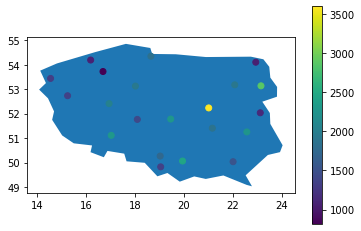

In [3]:

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.name=='Poland'].plot()
geo_df.plot(column="density", ax=ax, legend=True)



In [4]:
geo_df['area']

0      49.40
1     102.13
2     124.51
3     175.98
4     263.44
5      85.72
6      69.42
7     164.64
8      98.34
9     326.85
10    147.45
11    261.91
12    111.80
13    129.01
14     65.50
15    300.55
16     48.48
17    512.24
18    292.82
19    293.25
20     32.67
Name: area, dtype: float64

In [6]:
from folium import plugins

m = folium.Map(location=[52.232222, 20.008333], tiles="Stamen Toner", zoom_start=6)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    # assign a color marker for the type of volcano, Strato being the most common
    if geo_df.density[i] < 1000:
        type_color = "green"
    elif geo_df.density[i] < 2000 and geo_df.density[i] >= 1000:
        type_color = "blue"
    elif geo_df.density[i] < 3000 and geo_df.density[i] >= 2000:
        type_color = "orange"
    else:
        type_color = "purple"

    # Place the markers with the popup labels and data
    m.add_child(
        folium.Marker(
            location=coordinates,
            popup=
                "City: " + str(geo_df.city[i]) + "<br>"
                + "Area: " + str(geo_df['area'][i]) + "km^2<br>"
                + "Density: " + str(geo_df.density[i]) + "people/km^2<br>"
                + "Population: " + str(geo_df.no_people[i]) + "<br>",
            icon=folium.Icon(color="%s" % type_color),
        )
    )
    i = i + 1

m

In [9]:
from folium import plugins

m = folium.Map(location=[52.232222, 20.008333], tiles="Stamen Toner", zoom_start=6)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

plugins.HeatMap(heat_data).add_to(m)

m

In [ ]:
geo_df